# EDA по аутизму

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#from scipy.io.arff import loadarff

In [2]:
data = pd.read_csv('Autism_Data.arff')
#raw_data = loadarff('./Autism_Data.arff')
#df_data = pd.DataFrame(raw_data[0])

In [3]:
data.head().T # транспонируем, иначе не видно всех полей

,0,1,2,3,4
A1_Score,1,1,1,1,1
A2_Score,1,1,1,1,0
A3_Score,1,0,0,0,0
A4_Score,1,1,1,1,0
A5_Score,0,0,1,0,0
A6_Score,0,0,0,0,0
A7_Score,1,0,1,1,0
A8_Score,1,1,1,1,1
A9_Score,0,0,1,0,0
A10_Score,0,1,1,1,0


## Переименование столбцов
Похоже, что в именах столбцов присутствуют опечатки:

**jundice -> jaundice** - страдал ли пациент желтушкой новорожденных

**austim -> autism** - были ли случаи аутизма у ближайших родственников

Столбец **Class/ASD**, как я понимаю, представляет собой целевую переменную: страдает ли человек расстройством аутестического спектра. Переименуем его для простоты в **ASD**.

In [4]:
data.rename(columns = {"jundice":"jaundice", "austim":"autism", "Class/ASD":"ASD"}, inplace=True)
data.head(1).T

,0
A1_Score,1
A2_Score,1
A3_Score,1
A4_Score,1
A5_Score,0
A6_Score,0
A7_Score,1
A8_Score,1
A9_Score,0
A10_Score,0


## Первое впечатление о данных

In [5]:
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
autism             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
ASD                0
dtype: int64

На первый взгляд кажется, что пустых полей нет. Но выше в полях **ethnicity** и **relation** был замечен вопросительный знак '?'.

In [6]:
data.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jaundice           object
autism             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
ASD                object
dtype: object

Заметим, что признак **age** является объектом, а не целым числом как бы хотелось. Почему? Посмотрим, что можно будет с этим сделать далее.

Поля **gender, jaundice, autism, used_app_before** и целевая переменная **ASD** предположительно являются бинарными. Проверим это.

In [7]:
columns_to_check = ["gender", "jaundice", "autism", "used_app_before", "ASD"]
for elem in columns_to_check:
    print(data[elem].value_counts(), end='\n\n')

m    367
f    337
Name: gender, dtype: int64

no     635
yes     69
Name: jaundice, dtype: int64

no     613
yes     91
Name: autism, dtype: int64

no     692
yes     12
Name: used_app_before, dtype: int64

NO     515
YES    189
Name: ASD, dtype: int64



In [8]:
data["result"].value_counts()

4     131
3     110
5      83
2      74
6      70
7      57
8      55
9      47
1      33
10     30
0      14
Name: result, dtype: int64

# Индивидуальные характеристики

## Пол

In [9]:
data.groupby("gender")["ASD"].value_counts()

gender  ASD
f       NO     234
        YES    103
m       NO     281
        YES     86
Name: ASD, dtype: int64

Похоже, что у женщин аутизм встречается несколько чаще, чем у мужчин.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

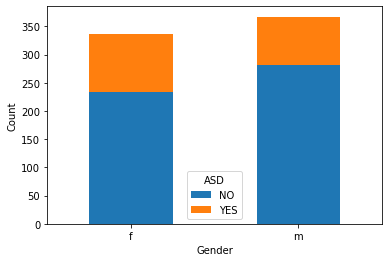

In [11]:
pd.crosstab(data["gender"], data["ASD"]).plot(kind='bar', stacked=True, rot=0)
plt.xlabel("Gender")
plt.ylabel("Count")

## Relation vs Ethnicity

In [12]:
pd.crosstab(data["relation"], data["ethnicity"])

ethnicity,'Middle Eastern ','South Asian',?,Asian,Black,Hispanic,Latino,Others,Pasifika,Turkish,White-European,others
relation,,,,,,,,,,,,
'Health care professional',0,0,0,1,1,0,0,1,0,0,1,0
?,0,0,95,0,0,0,0,0,0,0,0,0
Others,0,0,0,1,0,0,0,0,0,1,3,0
Parent,15,1,0,7,9,1,3,1,0,0,13,0
Relative,8,0,0,1,3,1,1,0,2,0,12,0
Self,69,35,0,113,30,11,16,28,10,5,204,1


Интересно, что поля **relation** и **ethnicity** пропущены у одних и тех же записей.  

## Этническая принадлежность

In [13]:
pd.crosstab(data["relation"], data["ASD"])

ASD,NO,YES
relation,,
'Health care professional',3,1
?,86,9
Others,4,1
Parent,38,12
Relative,19,9
Self,365,157


In [14]:
pd.crosstab(data["ethnicity"], data["ASD"])

ASD,NO,YES
ethnicity,,
'Middle Eastern ',84,8
'South Asian',33,3
?,86,9
Asian,107,16
Black,25,18
Hispanic,8,5
Latino,10,10
Others,21,9
Pasifika,11,1


Попробуем восстановить этническую принадлежность по стране.

In [15]:
data[data["ethnicity"]=='?'].contry_of_res.unique()

array(['Egypt', 'Bahamas', 'Austria', 'Argentina',
       "'United Arab Emirates'", 'Lebanon', 'Afghanistan',
       "'Saudi Arabia'", 'Jordan', 'Russia', "'New Zealand'",
       "'Hong Kong'", 'Japan', 'Ukraine', 'Kazakhstan', 'Brazil',
       "'United Kingdom'", 'Iran', "'United States'", 'Azerbaijan',
       'Pakistan', 'Iraq'], dtype=object)

In [16]:
data[data["ethnicity"]=='?'].contry_of_res.nunique()

22

Сгруппируем данные по этнической принадлежности:

In [17]:
group = data.groupby("ethnicity")
group["contry_of_res"].count()

ethnicity
'Middle Eastern '     92
'South Asian'         36
?                     95
Asian                123
Black                 43
Hispanic              13
Latino                20
Others                30
Pasifika              12
Turkish                6
White-European       233
others                 1
Name: contry_of_res, dtype: int64

Там, где это возможно, попробуем заменить этническую принадлежность на самую частую по стране:

In [18]:
cntry_lst = data[data["ethnicity"]=='?'].contry_of_res.unique()
#print(type(cntry_lst))
for cntry in cntry_lst:
    mode = data[data["contry_of_res"]==cntry].ethnicity.mode()
    #print(type(mode))
    #print(f"For country {cntry} mode is {mode}")
    #print(f"For country {cntry} sorted mode is {sorted(mode.tolist())}")
    if len(mode) == 1:
        data.loc[(data["ethnicity"]=="?") & (data["contry_of_res"]==cntry), "ethnicity"] = mode[0]
    elif len(mode) == 2 and '?' in mode.array:
        data.loc[(data["ethnicity"]=="?") & (data["contry_of_res"]==cntry), "ethnicity"] = mode[0] if mode[0]!= '?' else mode[1]

In [19]:
data[data["ethnicity"]=='?'].contry_of_res.unique()

array(['Argentina', 'Lebanon', 'Jordan', 'Russia', "'Hong Kong'", 'Japan',
       'Kazakhstan', 'Iran', 'Azerbaijan', 'Pakistan', 'Iraq'],
      dtype=object)

In [20]:
data[data["contry_of_res"]=="Bahamas"].ethnicity

9     Asian
12    Asian
Name: ethnicity, dtype: object

Проверим как изменилась группировка после замены:

In [21]:
group = data.groupby("ethnicity")
group["contry_of_res"].count()

ethnicity
'Middle Eastern '    113
'South Asian'         36
?                     63
Asian                129
Black                 43
Hispanic              13
Latino                21
Others                30
Pasifika              12
Turkish                6
White-European       237
others                 1
Name: contry_of_res, dtype: int64

Попробуем объединить некоторые из записей. Очевидно, что значение *others* надо переименовать в *Others*.
Возможно также, что *Hispanic* и *Latino*  - это синонимы. Посмотрим распределение стран с этими этническими принадлежностями.
Также *'South Asian'* выглядит как подмножество *Asian*. Проверим и это.

In [22]:
group = data.groupby("contry_of_res")
group["ethnicity"].count()

contry_of_res
'Costa Rica'         1
'Czech Republic'     1
'Hong Kong'          1
'New Zealand'       81
'Saudi Arabia'       4
                    ..
Sweden               2
Tonga                1
Turkey               1
Ukraine              2
Uruguay              1
Name: ethnicity, Length: 67, dtype: int64

In [23]:
data_temp = data[(data["ethnicity"]=='Hispanic') | (data["ethnicity"]=='Latino')]
pd.crosstab(data["contry_of_res"], data_temp["ethnicity"])

ethnicity,Hispanic,Latino
contry_of_res,,
'Costa Rica',0,1
'United Kingdom',0,1
'United States',11,1
Bolivia,0,1
Brazil,0,7
Chile,0,1
Ecuador,0,1
Italy,0,1
Mexico,1,6


Большинство - это страны Латинской Америки и США, где много выходцев из этих стран. Поэтому логично переименовать Hispanic -> Latino. 
Этим же значением заполним этническую принадлежность опрошенных из Аргентины.

In [24]:
data_temp = data[(data["ethnicity"]=='Asian') | (data["ethnicity"]=="'South Asian'")]
# хотелось написать что-то типа data['Asian' in data["ethnicity"]], но не придумал как

pd.crosstab(data["contry_of_res"], data_temp["ethnicity"])

ethnicity,'South Asian',Asian
contry_of_res,,
'New Zealand',9,31
'Sierra Leone',0,1
'Sri Lanka',1,13
'United Arab Emirates',1,2
'United Kingdom',0,2
'United States',1,4
'Viet Nam',0,4
Afghanistan,0,2
Aruba,0,1


Предположение про азиатов похоже на правду, т. к. большинство жителей стран [Южной Азии](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%B0%D1%8F_%D0%90%D0%B7%D0%B8%D1%8F#%D0%A1%D1%82%D1%80%D0%B0%D0%BD%D1%8B:) назвали себя просто азиатами. Поэтому заменим 'South Asian' на 'Asian'.

Турки как-то стоят особняком в списке этнической принадлежности. Отнести их к Ближнему Востоку или к азиатам?

In [25]:
data[data["ethnicity"] =='Turkish'].contry_of_res

255                   Armenia
393    'United Arab Emirates'
425    'United Arab Emirates'
557           'United States'
565                    Turkey
696                 Australia
Name: contry_of_res, dtype: object

In [26]:
data[data["contry_of_res"]=="Turkey"].ethnicity

565    Turkish
Name: ethnicity, dtype: object

Увы, Турция представлена только одним турком, поэтому не определиться с предпочтениями.

In [27]:
data_temp = data[data["ethnicity"]=="'Middle Eastern '"]
pd.crosstab(data["contry_of_res"], data_temp["ethnicity"])

ethnicity,'Middle Eastern '
contry_of_res,
'New Zealand',7
'Saudi Arabia',4
'United Arab Emirates',68
'United Kingdom',2
'United States',5
Afghanistan,9
AmericanSamoa,1
Armenia,1
Burundi,1


Термин Ближний Восток довольно [путанный](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D0%B9_%D0%92%D0%BE%D1%81%D1%82%D0%BE%D0%BA#%D0%92_%D0%B0%D0%BD%D0%B3%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%BC_%D1%8F%D0%B7%D1%8B%D0%BA%D0%B5). Это ясности не добавляет.

И все-таки отнесем для определенности турок именно к Ближнему Востоку.

In [28]:
data_temp = data[data["ethnicity"]=="Pasifika"]
pd.crosstab(data["contry_of_res"], data_temp["ethnicity"])

ethnicity,Pasifika
contry_of_res,
'New Zealand',7
'United Arab Emirates',1
'United States',1
Australia,1
Oman,1
Tonga,1


In [29]:
data[data["contry_of_res"]=="Oman"].ethnicity

99    Pasifika
Name: ethnicity, dtype: object

Житель Тихоокеанский островов в Омане смотрится несколько подозрительно. 

Можно было бы заменить их всех на азиатов из-за малости данных, но уж очень специфичная группа. Оставим их без изменений.

Итак, составим отображение между указанными выше этническими принадлежностями и согласно этому отображению произведем замену:

In [30]:
from_ = ["others", "Hispanic", "'South Asian'", "Turkish"]
to    = ["Others", "Latino",  "Asian",          "'Middle Eastern '"]
data["ethnicity"].replace(from_, to, inplace=True)

In [31]:
group = data.groupby("ethnicity")
group["contry_of_res"].count()

ethnicity
'Middle Eastern '    119
?                     63
Asian                165
Black                 43
Latino                34
Others                31
Pasifika              12
White-European       237
Name: contry_of_res, dtype: int64

Осталось 63 пропущенных значения. Посмотрим, что это за страны:

In [32]:
data[data["ethnicity"]=='?'].contry_of_res.unique()

array(['Argentina', 'Lebanon', 'Jordan', 'Russia', "'Hong Kong'", 'Japan',
       'Kazakhstan', 'Iran', 'Azerbaijan', 'Pakistan', 'Iraq'],
      dtype=object)

Придется обработать случай каждой из оставшихся стран отдельно, вручную.



Как уже было сказано выше, Аргентину заполним латиноамериканцами:

In [33]:
data[(data["contry_of_res"]=="Argentina")].ethnicity


14     ?
350    ?
Name: ethnicity, dtype: object

In [34]:
data.loc[(data["ethnicity"]=="?") & (data["contry_of_res"]=='Argentina'), "ethnicity"] = 'Latino'

In [35]:
data[(data["contry_of_res"]=="Lebanon")].ethnicity

24    ?
Name: ethnicity, dtype: object

Lebanon - это Ливан. Поэтому:

In [36]:
data.loc[(data["ethnicity"]=="?") & (data["contry_of_res"]=='Lebanon'), "ethnicity"] = "'Middle Eastern '"

In [37]:
data[(data["contry_of_res"]=="Jordan")].ethnicity

16     'Middle Eastern '
79                     ?
81                     ?
83     'Middle Eastern '
91                     ?
276                    ?
277                    ?
336    'Middle Eastern '
337                    ?
338                    ?
339                    ?
340                    ?
341                    ?
342                    ?
343                    ?
344                    ?
345                    ?
346                    ?
347                    ?
348                    ?
349                    ?
351                    ?
352                    ?
353                    ?
354                    ?
380                    ?
381                    ?
382                    ?
383                    ?
384                    ?
385                    ?
386                    ?
387                    ?
388                    ?
390                    ?
427                    ?
429                    ?
432                    ?
438                    ?
453                    ?


Очень много незаполненных значений.

In [38]:
data.loc[(data["ethnicity"]=="?") & (data["contry_of_res"]=='Jordan'), "ethnicity"] = "'Middle Eastern '"

In [39]:
data[(data["contry_of_res"]=="Jordan")].ethnicity

16     'Middle Eastern '
79     'Middle Eastern '
81     'Middle Eastern '
83     'Middle Eastern '
91     'Middle Eastern '
276    'Middle Eastern '
277    'Middle Eastern '
336    'Middle Eastern '
337    'Middle Eastern '
338    'Middle Eastern '
339    'Middle Eastern '
340    'Middle Eastern '
341    'Middle Eastern '
342    'Middle Eastern '
343    'Middle Eastern '
344    'Middle Eastern '
345    'Middle Eastern '
346    'Middle Eastern '
347    'Middle Eastern '
348    'Middle Eastern '
349    'Middle Eastern '
351    'Middle Eastern '
352    'Middle Eastern '
353    'Middle Eastern '
354    'Middle Eastern '
380    'Middle Eastern '
381    'Middle Eastern '
382    'Middle Eastern '
383    'Middle Eastern '
384    'Middle Eastern '
385    'Middle Eastern '
386    'Middle Eastern '
387    'Middle Eastern '
388    'Middle Eastern '
390    'Middle Eastern '
427    'Middle Eastern '
429    'Middle Eastern '
432    'Middle Eastern '
438    'Middle Eastern '
453    'Middle Eastern '


In [40]:
data[(data["contry_of_res"]=="Russia")].ethnicity

238                 ?
270                 ?
367            Others
593                 ?
636                 ?
699    White-European
701                 ?
Name: ethnicity, dtype: object

Умом Россию не понять, национальностей разных много, поэтому заполним как *Others*.

In [41]:
data.loc[(data["ethnicity"]=="?") & (data["contry_of_res"]=='Russia'), "ethnicity"] = "Others"

In [42]:
#"'Hong Kong'", 'Japan', 'Kazakhstan', 'Iran', 'Azerbaijan', 'Pakistan', 'Iraq'
#"'Hong Kong'", 'Japan', 'Kazakhstan',  'Pakistan', -> Asian
# 'Iran', 'Azerbaijan', 'Iraq' -> Middle East

Гонконг, Японию, Казахстан и Пакистан заполним азиатами:

In [43]:
data.loc[(data["contry_of_res"]=="'Hong Kong'") |
     (data["contry_of_res"]=="Japan") |
     (data["contry_of_res"]=="Kazakhstan") |
     (data["contry_of_res"]=="Pakistan"),["ethnicity","contry_of_res"]]

,ethnicity,contry_of_res
41,Asian,Pakistan
285,?,'Hong Kong'
355,?,Japan
372,?,Kazakhstan
399,?,Kazakhstan
564,?,Kazakhstan
659,?,Pakistan
702,Asian,Pakistan


In [44]:
data.loc[(data["ethnicity"]=="?") & (
                                     (data["contry_of_res"]=="'Hong Kong'") |
                                     (data["contry_of_res"]=="Japan") |
                                     (data["contry_of_res"]=="Kazakhstan") |
                                     (data["contry_of_res"]=="Pakistan")
                                    ),
         "ethnicity"] = "Asian"

In [45]:
data.loc[(data["contry_of_res"]=="Iran") |
     (data["contry_of_res"]=="Azerbaijan") |
     (data["contry_of_res"]=="Iraq"),["ethnicity","contry_of_res"]]

,ethnicity,contry_of_res
177,'Middle Eastern ',Iran
178,'Middle Eastern ',Iran
527,?,Iran
534,?,Iran
535,?,Iran
536,?,Iran
537,?,Iran
658,?,Azerbaijan
666,?,Iraq


Иран, Ирак заполним как Ближний Восток. Так поступим и с Азербайджаном (по аналогии с Турцией).

In [46]:
data.loc[(data["ethnicity"]=="?") & (
                                     (data["contry_of_res"]=="Iran") |
                                     (data["contry_of_res"]=="Azerbaijan") |
                                     (data["contry_of_res"]=="Iraq")
                                    ),
         "ethnicity"] = "'Middle Eastern '"

In [47]:
group = data.groupby("ethnicity")
group["contry_of_res"].count()

ethnicity
'Middle Eastern '    169
Asian                171
Black                 43
Latino                36
Others                36
Pasifika              12
White-European       237
Name: contry_of_res, dtype: int64

С пропусками в этнической принадлежности покончено!

In [48]:
pd.crosstab(data["ethnicity"], data["ASD"])

ASD,NO,YES
ethnicity,,
'Middle Eastern ',157,12
Asian,149,22
Black,25,18
Latino,20,16
Others,25,11
Pasifika,11,1
White-European,128,109


Бросается в глаза, что для белых, черных и латиноамериканцев количество страдающих аутизмом приближается к количеству здоровых людей, в то время как у азиатов и жителей Ближнего Востока оно значительно меньше. 

Text(0, 0.5, 'Count')

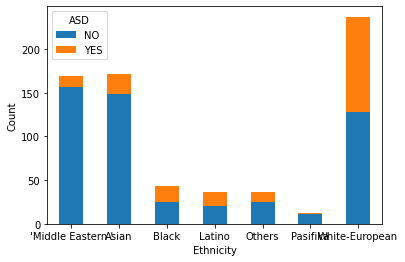

In [49]:
pd.crosstab(data["ethnicity"], data["ASD"]).plot(kind='bar', stacked=True, rot=0)
plt.xlabel("Ethnicity")
plt.ylabel("Count")

Первые три этнические группы массово встречаются в США. Возможно, с этим и связан рост аутистов. Поэтому исследуем влияние на аутизм страны проживания.

In [50]:
data1 = data[data["contry_of_res"] == "'United States'"]
pd.crosstab(data1["ethnicity"], data1["ASD"])

ASD,NO,YES
ethnicity,,
'Middle Eastern ',5,1
Asian,3,2
Black,6,4
Latino,6,6
Others,3,5
Pasifika,1,0
White-European,36,35


На примере США видно, что распределение примерно 50 на 50 для всех этнических принадлежностей.

## Страна проживания

In [51]:
cntry = pd.crosstab(data["contry_of_res"], data["ASD"])
cntry#.value_counts()

ASD,NO,YES
contry_of_res,,
'Costa Rica',1,0
'Czech Republic',1,0
'Hong Kong',1,0
'New Zealand',66,15
'Saudi Arabia',3,1
...,...,...
Sweden,0,2
Tonga,1,0
Turkey,1,0


Рассмотрим частоту заболевших по странам с достаточным количеством людей для выборки:

In [52]:
cntry["total"] = 0
cntry["freq"] = 0
cntry["total"] = cntry.agg("sum", axis=1)
cntry["freq"]  = 100 *cntry["YES"] / cntry["total"]
cntry[cntry["total"]>10].sort_values("freq")

ASD,NO,YES,total,freq
contry_of_res,,,,
'Sri Lanka',14,0,14,0.000000
'United Arab Emirates',79,3,82,3.658537
Jordan,45,2,47,4.255319
India,75,6,81,7.407407
Afghanistan,11,2,13,15.384615
'New Zealand',66,15,81,18.518519
'United Kingdom',48,29,77,37.662338
Australia,15,12,27,44.444444
France,6,5,11,45.454545


Подтверждается минимум числа заболевших в странах Азии.

Введем дополнительное поле "континент". И распределим страны по континентам по *географическому* признаку. Отнесем при этом Россию к Европе, а Турцию к Азии.

In [53]:
sorted(data["contry_of_res"].unique())

["'Costa Rica'",
 "'Czech Republic'",
 "'Hong Kong'",
 "'New Zealand'",
 "'Saudi Arabia'",
 "'Sierra Leone'",
 "'South Africa'",
 "'Sri Lanka'",
 "'United Arab Emirates'",
 "'United Kingdom'",
 "'United States'",
 "'Viet Nam'",
 'Afghanistan',
 'AmericanSamoa',
 'Angola',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Burundi',
 'Canada',
 'Chile',
 'China',
 'Cyprus',
 'Ecuador',
 'Egypt',
 'Ethiopia',
 'Finland',
 'France',
 'Germany',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Lebanon',
 'Malaysia',
 'Mexico',
 'Nepal',
 'Netherlands',
 'Nicaragua',
 'Niger',
 'Oman',
 'Pakistan',
 'Philippines',
 'Portugal',
 'Romania',
 'Russia',
 'Serbia',
 'Spain',
 'Sweden',
 'Tonga',
 'Turkey',
 'Ukraine',
 'Uruguay']

In [54]:
continent = {
'EU':
    ["'Czech Republic'",
     "'United Kingdom'",
     'Austria',
     'Belgium',
     'Finland',
     'France',
     'Germany',
     'Iceland',
     'Ireland',
     'Italy',
     'Netherlands',
     'Portugal',
     'Romania',
     'Russia',
     'Serbia',
     'Spain',
     'Sweden',
     'Ukraine'
    ],
'AS':
     ["'Hong Kong'",
      "'Saudi Arabia'",
      "'Sri Lanka'",
      "'United Arab Emirates'",
      "'Viet Nam'",
      'Afghanistan',
      'Armenia',
      'Azerbaijan',
      'Bangladesh',
      'China',
      'Cyprus',
      'India',
      'Indonesia',
      'Iran',
      'Iraq',
      'Japan',
      'Jordan',
      'Kazakhstan',
      'Lebanon',
      'Malaysia',
      'Nepal',
      'Oman',
      'Pakistan',
      'Philippines',
      'Turkey'
     ],
'AF':
     ["'Sierra Leone'",
      "'South Africa'",
      'Angola',
      'Burundi',
      'Egypt',
      'Ethiopia',
      'Niger'
     ],
'AU':
     ["'New Zealand'",
      'AmericanSamoa',
      'Australia',
      'Tonga'
     ],
'NA':
     ["'Costa Rica'",
      "'United States'",
      'Bahamas',
      'Canada',
      'Mexico',
      'Nicaragua'
     ],
'SA':
     ['Argentina',
      'Aruba',
      'Bolivia',
      'Brazil',
      'Chile',
      'Ecuador',
      'Uruguay'
     ]
}

# Quick check if I skipped anything:
n = 0
for k, v in continent.items():
    n += len(v)
print(n == data["contry_of_res"].nunique())

True


In [55]:
def get_continent(cntry):
    for key, value in continent.items():
        if cntry in value:
            return key

#Tests:
print(get_continent("Argentina"))
print(get_continent("Belarus"))

SA
None


In [56]:
data["continent"] = None
data["continent"] = data.apply(lambda row: get_continent(row.contry_of_res), axis=1)

In [57]:
data.loc[:,["contry_of_res", "continent"]].head(15)

,contry_of_res,continent
0,'United States',NA
1,Brazil,SA
2,Spain,EU
3,'United States',NA
4,Egypt,AF
5,'United States',NA
6,'United States',NA
7,'New Zealand',AU
8,'United States',NA
9,Bahamas,NA


In [58]:
data.continent.isnull().any()

False

In [59]:
pd.crosstab(data.continent, data.ASD)

ASD,NO,YES
continent,,
AF,8,3
AS,260,24
AU,83,28
EU,83,59
NA,72,68
SA,9,7


Text(0, 0.5, 'Count')

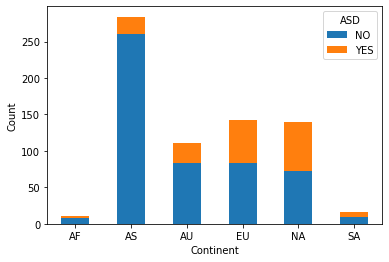

In [60]:
pd.crosstab(data["continent"], data["ASD"]).plot(kind='bar', stacked=True, rot=0)
plt.xlabel("Continent")
plt.ylabel("Count")

В Европе и Северной Америке распределение близко к 50 на 50, а в Азии число аутистов меньше 10%. По Африке и Южная Америке недостаточно данных для достоверных выводов. А вот результат по Австралии существенно отличается, если сравнить цифры по континенту и стране. Как вариант можно попробовать разбить континент Австралию на 2 : Австралию и Океанию, но я на этой сейчас время тратить не хочу.

Вывод: заменим **contry_of_res** на категориальный признак **continent**. Также уберем из данных связанную со страной этническую принадлежность **ethnicity**.

## Желтушка

In [61]:
data.groupby("jaundice")["ASD"].value_counts()

jaundice  ASD
no        NO     474
          YES    161
yes       NO      41
          YES     28
Name: ASD, dtype: int64

На первый взгляд желтушка новорожденных увеличивает вероятность возникновения аутизма. Но данных, кажется, не достаточно много, чобы говорить об этом с уверенностью.

In [62]:
pd.crosstab(data["jaundice"], data["gender"])

gender,f,m
jaundice,,
no,302,333
yes,35,34


**_Вывод:_** 
Желтушкой болеют независимо от пола.

In [63]:
pd.crosstab(data["jaundice"], data["age"]).T

jaundice,no,yes
age,,
17,15,3
18,28,3
19,31,4
20,44,2
21,46,3
22,36,1
23,37,0
24,32,2
25,26,1


In [64]:
pd.crosstab(data["jaundice"], data["relation"])

relation,'Health care professional',?,Others,Parent,Relative,Self
jaundice,,,,,,
no,3,85,5,40,23,479
yes,1,10,0,10,5,43


Среди анкет, заполненных родственниками, а особенно родителями, процент болевших желтушкой выше, что логично. Можно предположить, что люди, заполнявшие анкеты сами, не знают, была ли у них желтушка новорожденных. Тогда не стоит достоверно полагаться на это поле.

## Влияние аутизма у близких родственников

In [65]:
data.groupby("autism")["ASD"].value_counts()

autism  ASD
no      NO     467
        YES    146
yes     NO      48
        YES     43
Name: ASD, dtype: int64

Похоже, что наличие больных родственников почти в 2 раза увеличивает вероятность заболевания.

Можно ли утверждать, что оно обусловлено генетически?
Есть ли  да, то существует ли зависимость от пола? У кого скорее проявится этот ген?

Чтобы понять это воспользуемся factorplot, но для этого нам придется временно заменить целевую переменную числом.

In [66]:
data["asd"] = 0
data.loc[data["ASD"]=="YES", "asd"] = 1 #int(data["ASD"] == "YES" )

In [67]:
data.head().T

,0,1,2,3,4
A1_Score,1,1,1,1,1
A2_Score,1,1,1,1,0
A3_Score,1,0,0,0,0
A4_Score,1,1,1,1,0
A5_Score,0,0,1,0,0
A6_Score,0,0,0,0,0
A7_Score,1,0,1,1,0
A8_Score,1,1,1,1,1
A9_Score,0,0,1,0,0
A10_Score,0,1,1,1,0


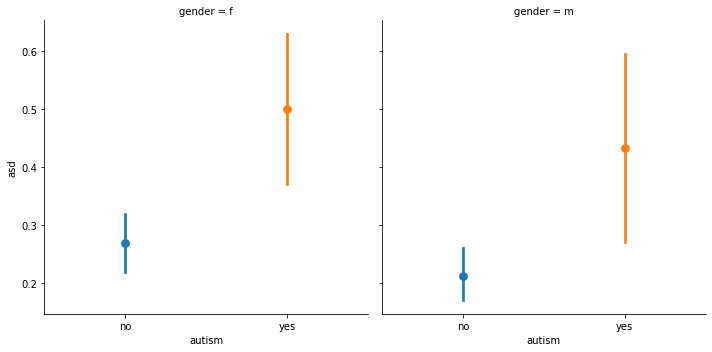

In [68]:
sns.factorplot("autism", "asd", hue = "autism",col="gender", data=data)
plt.show()

Как уже было замечено выше, женщины страдают аутизмом чуть чаще, но вряд ли это как-то связано с наличием больных родственников.

## Relation

In [69]:
data.relation.value_counts()

Self                          522
?                              95
Parent                         50
Relative                       28
Others                          5
'Health care professional'      4
Name: relation, dtype: int64

In [70]:
data["asd"] = 0
data.loc[data["ASD"]=="YES", "asd"] = 1 #int(data["ASD"] == "YES" )

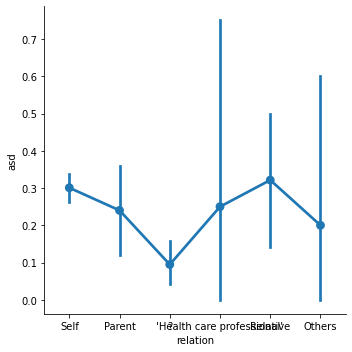

In [71]:
sns.factorplot('relation','asd',data=data)#,col='relation')#,hue="gender"
plt.show()

Памятуя, что ethnicity и relation были заполнены ? одновременно, логично предположить, что такой человек заполняли тест не сами. Его родственники тоже смогли определить его этническую принадлежность. Поэтому будет считать записи с "?" аналогичными *"Others"*.

Попробуем уменьшить область значений признака **relation**: сам опрашиваемый заполнял тест или не сам. Сразу воспользуемся для этого бинарной переменной.

In [72]:
data["rel"] = 0
data.loc[data["relation"]=="Self", "rel"] = 1

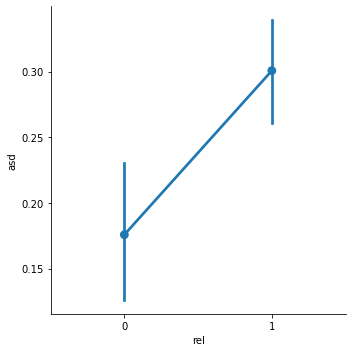

In [73]:
sns.factorplot('rel','asd',data=data, kind="point")#,col='relation')#,hue="gender"
plt.show()

Видно, что если опрашиваемый сам заполнял тест, то результат теста чаще выдавал наличие аутизма. Возможно, что в этом случае ответы более объективны и достоверны. Тогда родственники заполнят опросник более качественно, чем неродственники. Попробуем объединить родителей и родственников в отдельное значение. Тогда наша бинарная переменная превратится в порядковую.

In [74]:
data.loc[(data["relation"]=="Parent") |(data["relation"]=="Relative"), "rel"]=2

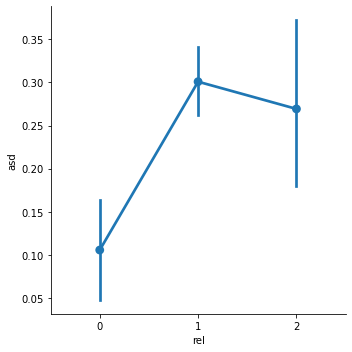

In [75]:
sns.factorplot('rel','asd',data=data)#,col='relation')#,hue="gender"
plt.show()

Предположение оправдалось. Тогда сократим признак relation до 3 значений: Self, Relative и  Others:

In [76]:
data.loc[(data["relation"]=="Parent"), "relation"] = "Relative"
data.loc[(data["relation"]=="?") |(data["relation"]=="'Health care professional'"), "relation"] = "Others"

In [77]:
data.relation.value_counts()

Self        522
Others      104
Relative     78
Name: relation, dtype: int64

In [78]:
data.groupby("age")["gender"].value_counts()

age  gender
17   m         11
     f          7
18   m         20
     f         11
19   f         22
               ..
61   f          1
     m          1
64   m          1
?    f          1
     m          1
Name: gender, Length: 86, dtype: int64

In [79]:
data[data["age"]=='17']

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,autism,contry_of_res,used_app_before,result,age_desc,relation,ASD,continent,asd,rel
6,0,1,0,0,0,0,0,1,0,0,...,no,'United States',no,2,'18 and more',Self,NO,NA,0,1
9,1,1,1,1,0,1,1,1,1,0,...,yes,Bahamas,no,8,'18 and more',Others,YES,NA,1,0
12,0,1,1,1,1,1,0,0,1,0,...,no,Bahamas,no,6,'18 and more',Others,NO,NA,0,0
13,1,0,0,0,0,0,1,1,0,1,...,no,Austria,no,4,'18 and more',Others,NO,EU,0,0
14,1,0,0,0,0,0,1,1,0,1,...,no,Argentina,no,4,'18 and more',Others,NO,SA,0,0
84,1,1,0,0,0,0,0,0,0,0,...,no,'New Zealand',no,2,'18 and more',Self,NO,AU,0,1
90,1,0,1,1,0,0,0,0,0,1,...,yes,Romania,no,4,'18 and more',Self,NO,EU,0,1
121,1,0,1,1,1,1,1,1,1,1,...,no,'United States',no,9,'18 and more',Self,YES,NA,1,1
226,1,1,1,1,1,1,1,0,1,1,...,no,India,no,9,'18 and more',Relative,YES,AS,1,2
237,1,0,0,0,0,0,0,0,0,1,...,no,'New Zealand',no,2,'18 and more',Self,NO,AU,0,1


## Возраст

In [80]:
any(data["age_desc"].isnull())

False

In [81]:
data["age_desc"].unique()

array(["'18 and more'"], dtype=object)

In [82]:
sorted(data["age"].unique())

['17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '383',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '58',
 '59',
 '60',
 '61',
 '64',
 '?']

Поле **age_desc** не информативно, т. к. оно одинаковое для всех полей и противоречиво, потому что значение *"18 and more"* прописано и для возраста 17 лет. Поэтому **age_desc** - кандидат на удаление.

В поле возраст есть подозрительные значения 383 и ?. Проверим их.

In [83]:
data["age"].value_counts()

21     49
20     46
23     37
22     37
19     35
24     34
27     31
18     31
30     30
26     28
25     27
29     27
28     24
31     21
17     18
32     18
35     17
37     17
33     16
40     16
42     15
36     13
38     12
34     12
43     11
44     10
47      8
39      7
55      6
53      6
46      6
50      5
52      5
48      4
45      4
49      3
41      3
54      2
58      2
?       2
56      2
61      2
59      1
64      1
60      1
383     1
51      1
Name: age, dtype: int64

In [84]:
data[data['age']=='?'].T

,62,91
A1_Score,0,0
A2_Score,0,1
A3_Score,0,0
A4_Score,0,0
A5_Score,0,1
A6_Score,0,0
A7_Score,0,1
A8_Score,0,0
A9_Score,0,0
A10_Score,0,1


Похоже, что знак вопроса "?" используется для обозначения пропущенных данных. Для удобства работы заменим его на NaN:

In [85]:
data.replace('?', np.NaN, inplace=True)

In [86]:
data[data["age"]=="?"]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,autism,contry_of_res,used_app_before,result,age_desc,relation,ASD,continent,asd,rel


Проверим еще раз пустые значения:

In [87]:
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jaundice           0
autism             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
ASD                0
continent          0
asd                0
rel                0
dtype: int64

Преобразуем возраст из строки сначала в вещественное число float. Такой вариант будет работать с NaN в отличие от int.

In [88]:
data["age"] = data["age"].apply(float)

In [89]:
data["age"]

0      26.0
1      24.0
2      27.0
3      35.0
4      40.0
       ... 
699    25.0
700    34.0
701    24.0
702    35.0
703    26.0
Name: age, Length: 704, dtype: float64

Ура! Теперь можно нормально работать с возрастом:

In [90]:
print('Oldest person:',data['age'].max(),'years')
print('Youngest person:',data['age'].min(),'years')
print('Average age:', round(data['age'].mean()),'years')

Oldest person: 383.0 years
Youngest person: 17.0 years
Average age: 30 years


Заменим выброс *383* на среднее, но беда в том, что сам этот выброс влияет на среднее. Наверное, стоит его выкинуть. 

In [91]:
data[data.age==383].T

,52
A1_Score,1
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [92]:
data1 = data[data.age!=383]
avg_age = round(data1.age.mean())
print(f"Average age = {avg_age}")
data.loc[data.age==383, "age"] = avg_age

Average age = 29


In [93]:
data['age'].fillna(avg_age,inplace=True)

In [94]:
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
autism             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
ASD                0
continent          0
asd                0
rel                0
dtype: int64

Пробелы в возрасте ликвидировали.

In [95]:
data["age"].describe()

count    704.000000
mean      29.193182
std        9.690790
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: age, dtype: float64

<AxesSubplot:>

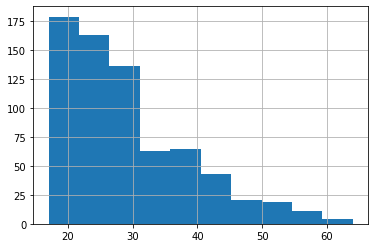

In [96]:
data.age.hist()

Number of ages: 48


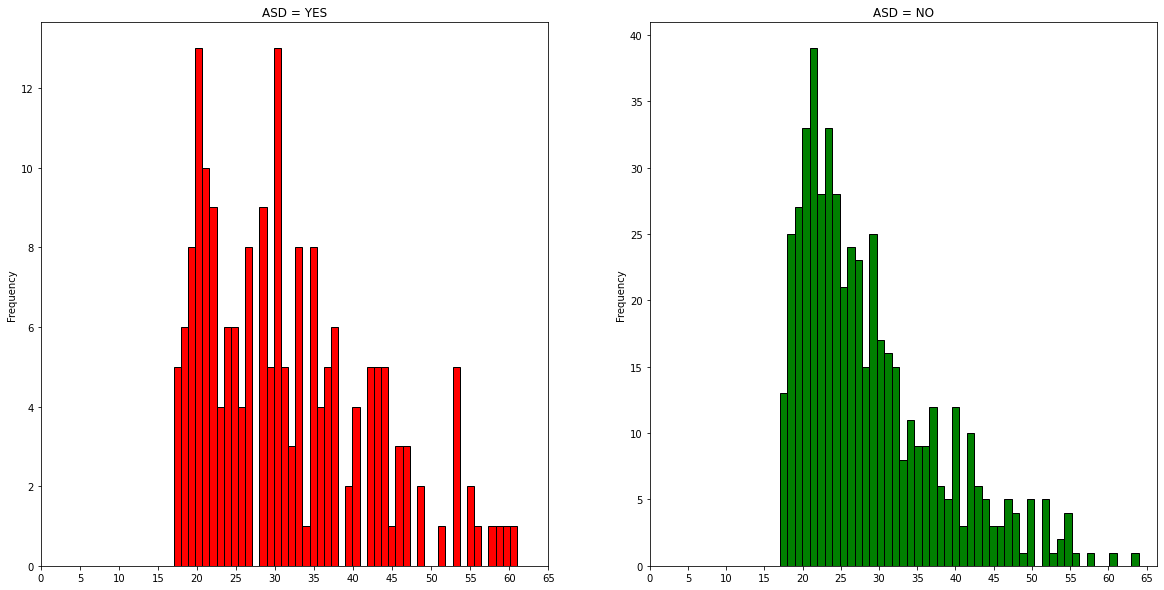

In [97]:
nof_ages = int(data["age"].max() - data["age"].min() + 1)
print(f"Number of ages: {nof_ages}")

f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['ASD']=='YES'].age.plot.hist(ax=ax[0],bins=nof_ages,edgecolor='black',color='red')
ax[0].set_title('ASD = YES')
x1=list(range(0,70,5))
ax[0].set_xticks(x1)
data[data['ASD']=='NO'].age.plot.hist(ax=ax[1],color='green',bins=nof_ages,edgecolor='black')
ax[1].set_title('ASD = NO')
x2=list(range(0,70,5))
ax[1].set_xticks(x2)
plt.show()

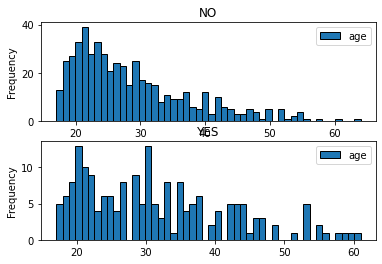

In [98]:
# То же самое другим способом:
data.plot.hist(column=["age"], bins=nof_ages,edgecolor='black',by="ASD", color='red')
plt.show()

Распределение по возрасту очень не равномерное. Поэтому лучше посмотреть частоту случаев аутизма в каждом возрасте.

<AxesSubplot:xlabel='age'>

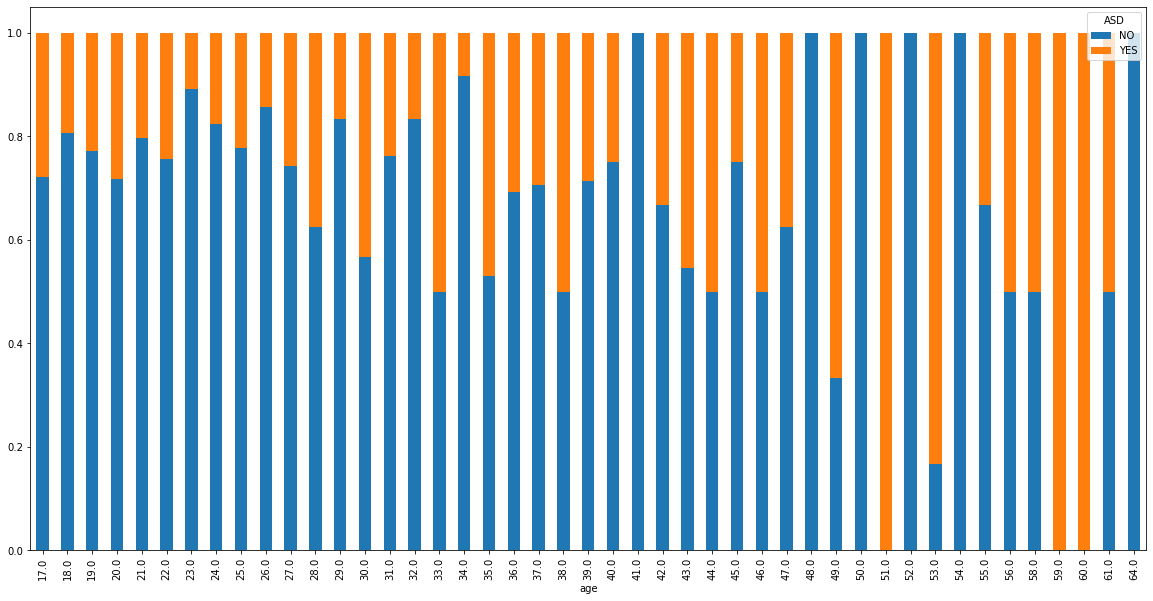

In [99]:
f,ax=plt.subplots(1,1,figsize=(20,10))

freq_asd_per_age =pd.crosstab(data["age"], data["ASD"])
freq_asd_per_age.div(freq_asd_per_age.sum(1), axis=0).plot.bar(ax=ax, stacked=True)

#plt.show()

После того как возраст переведен в число можно построить  violinplots:

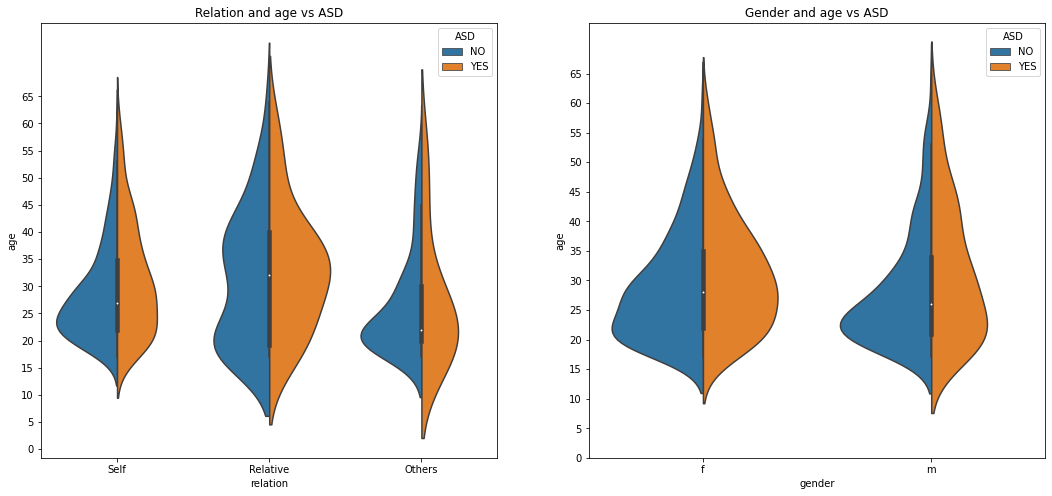

In [100]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("relation","age", hue="ASD", data=data,split=True,ax=ax[0])
ax[0].set_title('Relation and age vs ASD')
ax[0].set_yticks(range(0,70,5))
sns.violinplot("gender","age", hue="ASD", data=data,split=True,ax=ax[1])
ax[1].set_title('Gender and age vs ASD')
ax[1].set_yticks(range(0,70,5))
plt.show()

Из-за неравномерности мне трудно сделать какие-либо выводы из таких графиков. Попробуем разбить всех опрошенных на 6 корзин по 8 возрастов в каждой. 

In [101]:
def age_to_bins(nof_bins):
    delta = nof_ages / nof_bins

    data['age_band']=0
    for i in range(1, nof_bins):
        data.loc[(data['age']>=17 + i*delta)&(data['age']< 17 + (i+1)*delta),'age_band']= i
        
age_to_bins(6)
data.head().T

,0,1,2,3,4
A1_Score,1,1,1,1,1
A2_Score,1,1,1,1,0
A3_Score,1,0,0,0,0
A4_Score,1,1,1,1,0
A5_Score,0,0,1,0,0
A6_Score,0,0,0,0,0
A7_Score,1,0,1,1,0
A8_Score,1,1,1,1,1
A9_Score,0,0,1,0,0
A10_Score,0,1,1,1,0


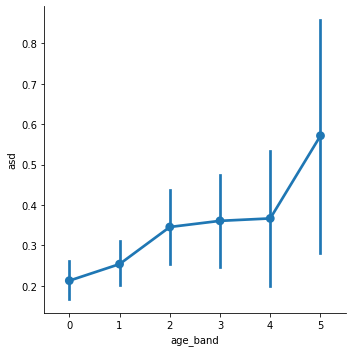

In [102]:
sns.factorplot('age_band','asd',data=data)
plt.show()

Похоже, что имеет смысл сократить число корзин до 3:

In [103]:
age_to_bins(3)
data.head().T

,0,1,2,3,4
A1_Score,1,1,1,1,1
A2_Score,1,1,1,1,0
A3_Score,1,0,0,0,0
A4_Score,1,1,1,1,0
A5_Score,0,0,1,0,0
A6_Score,0,0,0,0,0
A7_Score,1,0,1,1,0
A8_Score,1,1,1,1,1
A9_Score,0,0,1,0,0
A10_Score,0,1,1,1,0


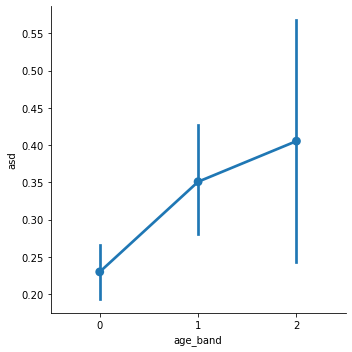

In [104]:
sns.factorplot('age_band','asd',data=data)
plt.show()

Поскольку мы ввели корзины, исходное поле  **age** можно будет удалить.

## Used_app_before

In [105]:
pd.crosstab(data["ASD"], data["used_app_before"])

used_app_before,no,yes
ASD,,
NO,508,7
YES,184,5


Нет какой-либо значимой связи с тем, был ли у человека опыт использования скринингового приложения или нет.
Это поле - кандидат на удаление.

# AQs

Поведенческие характеристики [AQ10](https://docs.autismresearchcentre.com/tests/AQ10.pdf) уже представляют собой бинарные переменные. 

### Верификация данных

Проверим утверждение, что поле result представляет собой сумму полей A*_Score:

In [106]:
any(data[data.columns[0:10]].sum(axis=1)==data["result"])

True

_Вывод:_

Данные корректны

Интересно, в равной ли степени, каждое из этих полей влияет на результат. Построим матрицу корреляций:

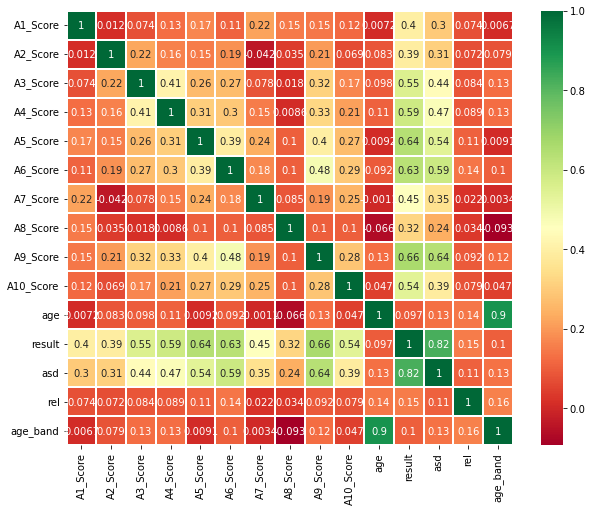

In [107]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Значения корреляции между **A*_Score** и **result** близки к 1/2.
Значит, эти признаки важны.

Интересно, если поставить задачу регрессии предсказания значения **result** по поведенческим характеристикам **A*_Store***и решать ее линейной регрессией, насколько близки будут коэффициенты к 1?

А **asd** и **result** высоко коррелируют между собой.

### Result

In [108]:
pd.crosstab(data["result"]>=7, data["ASD"])

ASD,NO,YES
result,,
False,515,0
True,0,189


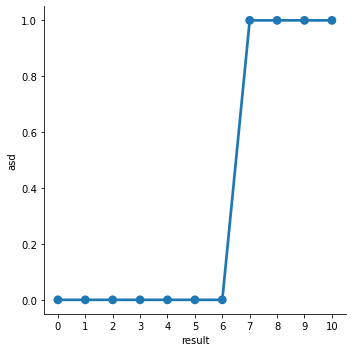

In [109]:
sns.factorplot("result", "asd", data=data)

Вывод: все данные по сумме баллов опросника можно разделить на 2 категории:
 - result <= 6: 100% не страдают аутизмом
 - result > 6: 100% имеют расстройства аутестического спектра
 
 Интересно, что граничное значение 6 для данных трактуется, как отсутствие аутизма. В то время как в [документе](https://docs.autismresearchcentre.com/tests/AQ10.pdf) - это повод пройти дополнительное обследование. При достаточной количестве данных было бы интересно рассмотреть именно этот граничный случай. Как индивидуальные характеристики влияют на наличие аутизма при result == 6? 

 Но пока получается, что что значение **asd** практически однозначно определяется величиной поля **result**, индивидуальные характеристики не влияют на результат, а все поведенческие характеристики влияют на результат в равной степени.

Возможно, что есть какая-то корреляция между индивидуальными и поведенческими характеристиками?
Тогда интересно было бы рассмотреть задачу регрессии для предсказания значения **result** только по индивидуальным характеристикам.
 

## Конвертация бинарных признаков в числовые

In [110]:
data['gender'].replace(['m','f'],[0,1],inplace=True)
data['autism'].replace(['no','yes'],[0,1],inplace=True)
data['jaundice'].replace(['no','yes'],[0,1],inplace=True)
data['ASD'].replace(['NO','YES'],[0,1],inplace=True)

data.head(3).T

,0,1,2
A1_Score,1,1,1
A2_Score,1,1,1
A3_Score,1,0,0
A4_Score,1,1,1
A5_Score,0,0,1
A6_Score,0,0,0
A7_Score,1,0,1
A8_Score,1,1,1
A9_Score,0,0,1
A10_Score,0,1,1


## Конвертация категориальных признаков

Ниже 
```python
drop_first=True
```
нужен, чтобы избежать [ловушки фиктивных переменных](https://www.codecamp.ru/blog/dummy-variable-trap/).
Правда, в этом случае мне не очень понятно,как тогда для новых переменных правильно интерпертировать матрицу корреляции и, например, коэффициенты в линейной регрессии?

In [111]:
data = pd.get_dummies(data, columns=['relation', 'continent'], drop_first=True)

In [112]:
data.head(2).T

,0,1
A1_Score,1,1
A2_Score,1,1
A3_Score,1,0
A4_Score,1,1
A5_Score,0,0
A6_Score,0,0
A7_Score,1,0
A8_Score,1,1
A9_Score,0,0
A10_Score,0,1


## Удаление ненужных параметров

In [113]:
data.drop(['used_app_before','age_desc','age','asd','contry_of_res', "rel", "ethnicity"],axis=1,inplace=True)

In [114]:
data.head(2).T

,0,1
A1_Score,1,1
A2_Score,1,1
A3_Score,1,0
A4_Score,1,1
A5_Score,0,0
A6_Score,0,0
A7_Score,1,0
A8_Score,1,1
A9_Score,0,0
A10_Score,0,1


Переставим **ASD** в конец.

In [115]:
cols_at_end = ['ASD']
data = data[[c for c in data if c not in cols_at_end] 
        + [c for c in cols_at_end if c in data]]

## Heatmap

In [116]:
corr_mx = data.corr()
mask_ = np.triu(np.ones(corr_mx.shape)).astype(np.bool)

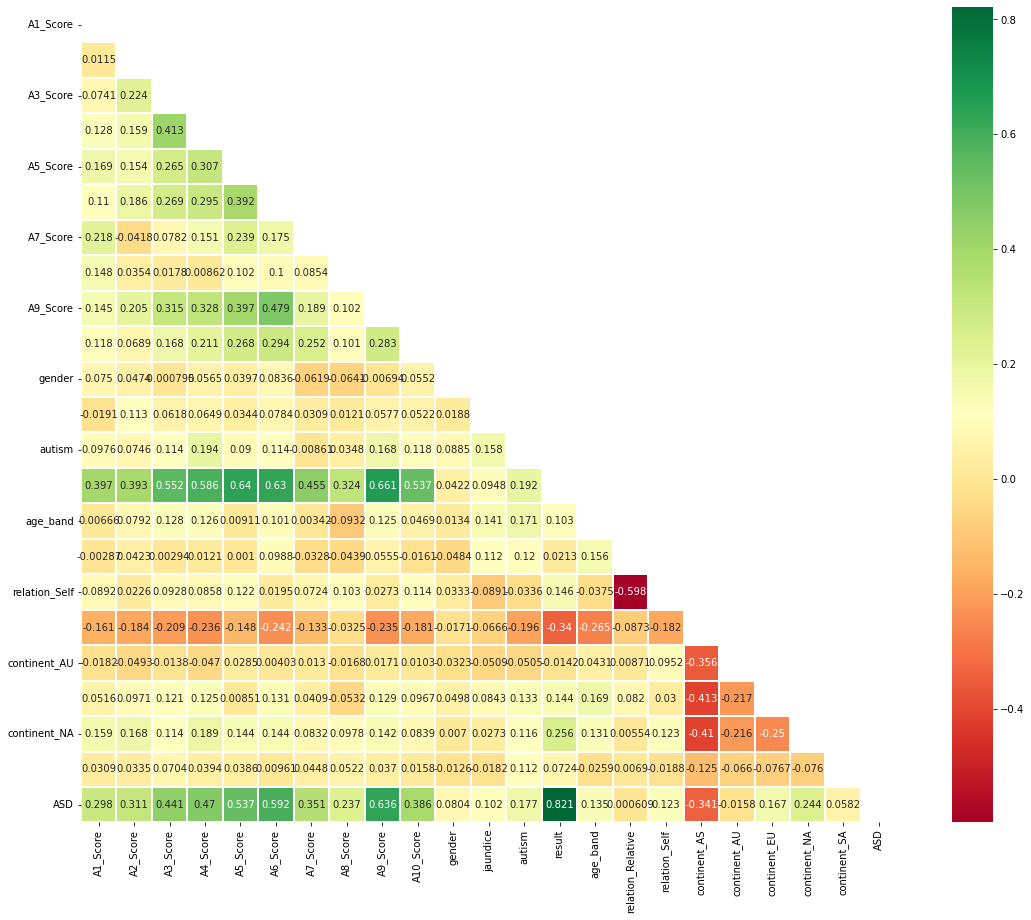

In [117]:
sns.heatmap(corr_mx,annot=True,cmap='RdYlGn',linewidths=0.05, fmt=".3g", square=True, mask=mask_) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

По такой матрице трудно понять зависимость от категориальных полей.

# Линейная регрессия

Попробуем предсказать значение **result** по поведенчиским характеристикам. Так себе задачка, но для первого раза подойдет. 
Интересно посмотреть, как близко коэффициенты окажутся равны 1.

In [118]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'jaundice',
       'autism', 'result', 'age_band', 'relation_Relative', 'relation_Self',
       'continent_AS', 'continent_AU', 'continent_EU', 'continent_NA',
       'continent_SA', 'ASD'],
      dtype='object')

In [119]:
X = data[[col for col in data.columns if '_Score' in col]]
y = data["result"]

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Выведем коэффициенты, по идее все они должны быть близки к 1, а свободный член близок к 0:

In [123]:
lr.coef_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [124]:
lr.intercept_

8.881784197001252e-16

In [125]:
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

In [126]:
np.array(y_test)

array([ 6,  3,  7,  7,  3,  5,  5,  2,  2,  6,  6,  1,  5,  7,  6,  3,  3,
        4,  8,  8,  9,  4,  4,  3,  9,  2,  0,  4,  2,  9,  7,  5, 10,  4,
        6,  6,  4,  3, 10,  6,  7, 10,  3,  3,  3,  4,  2,  5,  2,  8,  8,
        0,  9,  1,  3,  5,  4,  3, 10,  4,  6,  6,  4,  3,  4,  4,  6,  4,
        3,  4, 10,  3,  5, 10,  4,  7,  8,  3,  8,  1,  2,  6,  3,  6,  1,
        5,  7,  3,  1,  3,  3,  7,  6,  2,  2,  3,  6, 10,  6,  9,  9,  6,
        9,  7,  6,  0,  2,  4,  7,  5,  3,  1,  8,  0,  3,  7,  7,  8,  8,
        5,  3,  6,  3,  7,  2,  1,  3,  6,  5,  3,  6,  7,  9,  8,  7,  3,
        4,  5,  4,  2,  4], dtype=int64)

In [127]:
np.array(y_test_predicted)

array([6.0000000e+00, 3.0000000e+00, 7.0000000e+00, 7.0000000e+00,
       3.0000000e+00, 5.0000000e+00, 5.0000000e+00, 2.0000000e+00,
       2.0000000e+00, 6.0000000e+00, 6.0000000e+00, 1.0000000e+00,
       5.0000000e+00, 7.0000000e+00, 6.0000000e+00, 3.0000000e+00,
       3.0000000e+00, 4.0000000e+00, 8.0000000e+00, 8.0000000e+00,
       9.0000000e+00, 4.0000000e+00, 4.0000000e+00, 3.0000000e+00,
       9.0000000e+00, 2.0000000e+00, 8.8817842e-16, 4.0000000e+00,
       2.0000000e+00, 9.0000000e+00, 7.0000000e+00, 5.0000000e+00,
       1.0000000e+01, 4.0000000e+00, 6.0000000e+00, 6.0000000e+00,
       4.0000000e+00, 3.0000000e+00, 1.0000000e+01, 6.0000000e+00,
       7.0000000e+00, 1.0000000e+01, 3.0000000e+00, 3.0000000e+00,
       3.0000000e+00, 4.0000000e+00, 2.0000000e+00, 5.0000000e+00,
       2.0000000e+00, 8.0000000e+00, 8.0000000e+00, 8.8817842e-16,
       9.0000000e+00, 1.0000000e+00, 3.0000000e+00, 5.0000000e+00,
       4.0000000e+00, 3.0000000e+00, 1.0000000e+01, 4.0000000e

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [129]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(8.881784197001252e-16, 8.897532041322176e-16)

In [130]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(1.4694373400483978e-30, 1.4268381754230225e-30)

# KNN

Та же задача, решенная при помощи KNN.

In [131]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [132]:
y_train_predicted_knn = knn.predict(X_train)
y_test_predicted_knn = knn.predict(X_test)

In [133]:
np.array(y_test)

array([ 6,  3,  7,  7,  3,  5,  5,  2,  2,  6,  6,  1,  5,  7,  6,  3,  3,
        4,  8,  8,  9,  4,  4,  3,  9,  2,  0,  4,  2,  9,  7,  5, 10,  4,
        6,  6,  4,  3, 10,  6,  7, 10,  3,  3,  3,  4,  2,  5,  2,  8,  8,
        0,  9,  1,  3,  5,  4,  3, 10,  4,  6,  6,  4,  3,  4,  4,  6,  4,
        3,  4, 10,  3,  5, 10,  4,  7,  8,  3,  8,  1,  2,  6,  3,  6,  1,
        5,  7,  3,  1,  3,  3,  7,  6,  2,  2,  3,  6, 10,  6,  9,  9,  6,
        9,  7,  6,  0,  2,  4,  7,  5,  3,  1,  8,  0,  3,  7,  7,  8,  8,
        5,  3,  6,  3,  7,  2,  1,  3,  6,  5,  3,  6,  7,  9,  8,  7,  3,
        4,  5,  4,  2,  4], dtype=int64)

In [134]:
np.array(y_test_predicted_knn)

array([ 4.8,  2.8,  6.6,  7.2,  2.8,  4.8,  4.6,  2.2,  2. ,  6.6,  5.2,
        1. ,  4.6,  8. ,  5.8,  3.2,  2.6,  4.2,  8.2,  8.8, 10. ,  4. ,
        4. ,  3. ,  9. ,  2.2,  0. ,  4.4,  2.2, 10. ,  7.6,  4.2, 10. ,
        4. ,  5.8,  6.6,  4.2,  2.8, 10. ,  5.4,  7.6, 10. ,  3.4,  2.8,
        1.4,  4.4,  2.4,  4.2,  2.2,  8.6,  8.2,  0. ,  9. ,  1. ,  3.4,
        4.6,  4.2,  3. , 10. ,  4. ,  6. ,  5.6,  4. ,  3. ,  4. ,  3.8,
        5.8,  3.6,  2.8,  4. , 10. ,  2.6,  4.4, 10. ,  4.2,  7.2,  8. ,
        2.8,  8.4,  1. ,  2. ,  5. ,  3. ,  5.4,  1. ,  4.6,  6.8,  2.2,
        1. ,  2.8,  3.6,  7.2,  6. ,  1.8,  1.8,  2.8,  4.2, 10. ,  5.8,
        9. ,  9. ,  6.2,  9. ,  7.6,  6. ,  0. ,  1. ,  4. ,  8.2,  5.4,
        2.8,  1.2,  8. ,  0. ,  3. ,  7. ,  6.8,  8. ,  8.2,  4.6,  2.6,
        6.2,  3.4,  7.2,  1.6,  1.4,  1.8,  5.2,  4.2,  1.8,  5.8,  8.2,
        9. ,  8.6,  7.8,  3. ,  3.6,  5.2,  4. ,  2. ,  4. ])

In [135]:
mean_absolute_error(y_train_predicted_knn, y_train), mean_absolute_error(y_test_predicted_knn, y_test)

(0.24085257548845473, 0.31347517730496455)

In [136]:
mean_squared_error(y_train_predicted_knn, y_train), mean_squared_error(y_test_predicted_knn, y_test)

(0.12987566607460035, 0.2283687943262411)

# Линейная регрессия 2

А теперь попробуем предсказать **result** только по индивидуальным характеристикам.

In [137]:
X = data[[col for col in data.columns if '_Score' not in col]]
X.drop(['result', 'ASD'], axis=1, inplace=True)
y = data["result"]

In [138]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [139]:
lr.coef_

array([ 0.17260278,  0.54337085,  0.83990639, -0.12708312,  0.75448698,
        0.80749272, -1.31245746, -0.47568864,  0.12823363,  0.68508458,
        1.11994705])

In [140]:
lr.intercept_

4.526645098897596

In [141]:
for i, coef in enumerate(X.columns):
    print(coef, ' '*(17-len(coef)), '  |  ', 'k_'+str(i),' '*(1-(i//10)), '  |  ', lr.coef_[i])

gender               |   k_0     |   0.17260277579115457
jaundice             |   k_1     |   0.5433708489768077
autism               |   k_2     |   0.8399063859727919
age_band             |   k_3     |   -0.1270831197427295
relation_Relative    |   k_4     |   0.7544869818394152
relation_Self        |   k_5     |   0.8074927249434048
continent_AS         |   k_6     |   -1.3124574588799225
continent_AU         |   k_7     |   -0.47568864258390925
continent_EU         |   k_8     |   0.1282336258812566
continent_NA         |   k_9     |   0.6850845843849818
continent_SA         |   k_10    |   1.1199470533885016


In [142]:
y_test_predicted = lr.predict(X_test)
y_train_predicted = lr.predict(X_train)

In [143]:
np.array(y_test)

array([ 4,  2,  9,  3,  5,  8,  4,  2,  2,  3,  2,  7, 10,  9,  3, 10,  2,
        3,  5,  4,  4,  6,  4,  1,  6,  7,  3,  4,  4,  4,  1,  4,  4,  4,
        4,  7,  3,  4,  3,  4,  4,  4,  5,  2,  7,  2,  6,  6,  3,  3,  5,
        4,  4,  2,  0,  2,  9,  8,  7,  3,  3,  3,  5,  6,  2,  8,  2,  5,
        2,  8,  4,  3,  5,  7,  7,  3,  8,  2,  8,  1,  1,  8,  4,  6,  5,
        2,  3,  0,  2,  5,  4,  4,  5,  8,  6,  2,  1,  1,  7,  4,  1,  6,
        4,  3,  7,  1,  3,  5,  8,  7,  9,  1,  3,  0,  7,  7,  2,  3,  4,
        9,  5,  4,  3,  2,  9,  6, 10,  7,  7,  6,  0,  4,  8,  2,  5,  8,
        7,  4,  7,  1,  4], dtype=int64)

In [144]:
np.array(y_test_predicted)

array([6.19182518, 4.19428314, 4.73136606, 4.19428314, 6.29479175,
       5.46237145, 4.02168036, 4.85844918, 5.50789111, 3.38679042,
       5.63497423, 6.56259326, 6.17519472, 5.93765894, 6.30227784,
       5.75157606, 4.57216475, 6.62668765, 3.89459725, 4.02168036,
       6.67903993, 4.85844918, 4.19428314, 7.03173157, 4.06720002,
       6.17834507, 4.60428294, 4.02168036, 5.45488536, 5.50789111,
       4.02168036, 4.85844918, 5.63497423, 5.33528833, 4.73136606,
       6.19182518, 4.02168036, 4.80544344, 4.19428314, 4.19428314,
       4.85844918, 6.90464845, 6.01922241, 3.21418764, 4.85844918,
       4.19428314, 3.89459725, 4.85844918, 3.21418764, 3.96867462,
       4.02168036, 7.4480193 , 5.33413782, 4.02168036, 4.01419428,
       3.75755849, 5.03105196, 5.79746983, 6.01922241, 4.19428314,
       4.02168036, 4.43796809, 6.06474206, 4.19428314, 4.02168036,
       6.19182518, 5.45488536, 3.96867462, 5.46237145, 5.50789111,
       4.19428314, 4.19428314, 5.03105196, 5.03105196, 6.06474

In [145]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(1.8261028621412847, 1.9354088634985938)

In [146]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(5.135427483164496, 5.543633629166089)

# KNN 2

In [147]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)

y_train_predicted_knn = knn.predict(X_train)
y_test_predicted_knn = knn.predict(X_test)

In [148]:
np.array(y_test)

array([ 4,  2,  9,  3,  5,  8,  4,  2,  2,  3,  2,  7, 10,  9,  3, 10,  2,
        3,  5,  4,  4,  6,  4,  1,  6,  7,  3,  4,  4,  4,  1,  4,  4,  4,
        4,  7,  3,  4,  3,  4,  4,  4,  5,  2,  7,  2,  6,  6,  3,  3,  5,
        4,  4,  2,  0,  2,  9,  8,  7,  3,  3,  3,  5,  6,  2,  8,  2,  5,
        2,  8,  4,  3,  5,  7,  7,  3,  8,  2,  8,  1,  1,  8,  4,  6,  5,
        2,  3,  0,  2,  5,  4,  4,  5,  8,  6,  2,  1,  1,  7,  4,  1,  6,
        4,  3,  7,  1,  3,  5,  8,  7,  9,  1,  3,  0,  7,  7,  2,  3,  4,
        9,  5,  4,  3,  2,  9,  6, 10,  7,  7,  6,  0,  4,  8,  2,  5,  8,
        7,  4,  7,  1,  4], dtype=int64)

In [149]:
np.array(y_test_predicted_knn)

array([6.5, 4. , 3.5, 4. , 5.5, 3.5, 2.5, 5. , 4. , 4.5, 6.5, 4.5, 8.5,
       6. , 4. , 5.5, 1.5, 5. , 4. , 2.5, 6.5, 5. , 4. , 3. , 3.5, 6. ,
       6. , 2.5, 8.5, 4. , 2.5, 5. , 6.5, 5. , 3.5, 6.5, 2.5, 5.5, 4. ,
       4. , 5. , 7.5, 4.5, 2.5, 5. , 4. , 4. , 5. , 2.5, 3.5, 2.5, 5.5,
       4. , 2.5, 3. , 3. , 5. , 6.5, 4.5, 4. , 2.5, 4. , 8.5, 4. , 2.5,
       6.5, 8.5, 3.5, 3.5, 4. , 4. , 4. , 5. , 5. , 8.5, 4.5, 4.5, 2.5,
       7.5, 6. , 4.5, 6.5, 4.5, 6.5, 2.5, 6. , 5. , 3.5, 4. , 2.5, 5. ,
       5. , 6.5, 6.5, 6.5, 3.5, 4.5, 5. , 3.5, 5.5, 5. , 5. , 2.5, 2.5,
       2.5, 1. , 7. , 4. , 7.5, 6.5, 6.5, 3.5, 5. , 4.5, 4. , 6.5, 3. ,
       4.5, 5. , 6.5, 2.5, 3. , 2.5, 4.5, 8.5, 4.5, 5. , 6.5, 4.5, 3.5,
       6.5, 2.5, 6.5, 6.5, 4.5, 5. , 4.5, 3.5, 5.5, 2.5, 2.5])

In [150]:
mean_absolute_error(y_train_predicted_knn, y_train), mean_absolute_error(y_test_predicted_knn, y_test)

(1.800177619893428, 1.8971631205673758)

In [151]:
mean_squared_error(y_train_predicted_knn, y_train), mean_squared_error(y_test_predicted_knn, y_test)

(5.286412078152753, 5.565602836879433)

Очень плохие результаты :(